<h1 align ="center"><a href="http://" style="color: #c9c916; font-size: 50px; font-family: Comic Sans MS; text-decoration: underline;" target="_self">E-commerce Customer  Behavior Analysis</a></h1>


<h2 align="center"><B> <font color='gray'>DATASET DESCRIPTION</B></font></h2>

<div class="alert alert-block alert-warning">  

<B>VARIABLES</B>

1. YEAR (2008)

---

2. MONTH -> from April (4) to August (8)

---

3. DAY -> day number of the month

---

4. ORDER -> sequence of clicks during one session
---

5. COUNTRY -> variable indicating the country of origin of the IP address with the 
following categories:

1-Australia

2-Austria

3-Belgium

4-British Virgin Islands

5-Cayman Islands

6-Christmas Island

7-Croatia

8-Cyprus

9-Czech Republic

10-Denmark

11-Estonia

12-unidentified

13-Faroe Islands

14-Finland

15-France

16-Germany

17-Greece

18-Hungary

19-Iceland

20-India

21-Ireland

22-Italy

23-Latvia

24-Lithuania

25-Luxembourg

26-Mexico

27-Netherlands

28-Norway

29-Poland

30-Portugal

31-Romania

32-Russia

33-San Marino

34-Slovakia

35-Slovenia

36-Spain

37-Sweden

38-Switzerland

39-Ukraine

40-United Arab Emirates

41-United Kingdom

42-USA

43-biz (*.biz)

44-com (*.com)

45-int (*.int)

46-net (*.net)

47-org (*.org)


---

6. SESSION ID -> variable indicating session id (short record)
---
7. PAGE 1 (MAIN CATEGORY) -> concerns the main product category:
1-trousers

2-skirts

3-blouses

4-sale


---

8. PAGE 2 (CLOTHING MODEL) -> contains information about the code for each product 
(217 products)

---

9. COLOUR -> colour of product

1-beige

2-black

3-blue

4-brown

5-burgundy

6-gray

7-green

8-navy blue

9-of many colors

10-olive

11-pink

12-red

13-violet

14-white

---

10. LOCATION -> photo location on the page, the screen has been divided into six parts:

1-top left

2-top in the middle

3-top right

4-bottom left

5-bottom in the middle

6-bottom right

---

11. MODEL PHOTOGRAPHY -> variable with two categories: 

1-en face

2-profile

---

12. PRICE -> price in US dollars

---

13. PRICE 2 -> variable informing whether the price of a particular product is higher than 
the average price for the entire product category

1-yes

2-no

---

14. PAGE -> page number within the e-store website (from 1 to 5)

---

CITE: £apczyñski M., Bia³ow¹s S. (2013) Discovering Patterns of Users' Behaviour in an E-shop - 
Comparison of Consumer Buying Behaviours in Poland and Other European Countries, 
“Studia Ekonomiczne”, nr 151, “La société de l'information : perspective européenne et 
globale : les usages et les risques d'Internet pour les citoyens et les consommateurs”, p. 144-
153.



---
</div>



<div class="alert alert-block alert-info">
<H3><b>GOAL:</b> Classify which main product category (e.g., trousers, skirts, blouses, sale) a user is likely to engage with based on other available features or attributes in the dataset.¶</H3>
</div>

<h2 align="center"><B> <font color='gray'>IMPORTING THE LIBRARIES</B></font></h2>

In [52]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [53]:
data = pd.read_csv('/kaggle/input/clickstream-data-for-online-shopping/e-shop clothing 2008.csv', delimiter=';')

In [54]:
data.head()

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,2008,4,1,1,29,1,1,A13,1,5,1,28,2,1
1,2008,4,1,2,29,1,1,A16,1,6,1,33,2,1
2,2008,4,1,3,29,1,2,B4,10,2,1,52,1,1
3,2008,4,1,4,29,1,2,B17,6,6,2,38,2,1
4,2008,4,1,5,29,1,2,B8,4,3,2,52,1,1


In [55]:
data.describe()

,year,month,day,order,country,session ID,page 1 (main category),colour,location,model photography,price,price 2,page
count,165474.0,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000
mean,2008.0,5.585887,14.524554,9.817476,26.952621,12058.417056,2.400842,6.227655,3.258198,1.260071,43.802507,1.488167,1.710166
std,0.0,1.328160,8.830374,13.478411,7.150691,7008.418903,1.144420,4.235606,1.713206,0.438674,12.548131,0.499861,0.982412
min,2008.0,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000
25%,2008.0,4.000000,7.000000,2.000000,29.000000,5931.000000,1.000000,3.000000,2.000000,1.000000,33.000000,1.000000,1.000000
50%,2008.0,5.000000,14.000000,6.000000,29.000000,11967.500000,2.000000,4.000000,3.000000,1.000000,43.000000,1.000000,1.000000
75%,2008.0,7.000000,22.000000,12.000000,29.000000,18219.000000,3.000000,9.000000,5.000000,2.000000,52.000000,2.000000,2.000000
max,2008.0,8.000000,31.000000,195.000000,47.000000,24026.000000,4.000000,14.000000,6.000000,2.000000,82.000000,2.000000,5.000000


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165474 entries, 0 to 165473
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   year                     165474 non-null  int64 
 1   month                    165474 non-null  int64 
 2   day                      165474 non-null  int64 
 3   order                    165474 non-null  int64 
 4   country                  165474 non-null  int64 
 5   session ID               165474 non-null  int64 
 6   page 1 (main category)   165474 non-null  int64 
 7   page 2 (clothing model)  165474 non-null  object
 8   colour                   165474 non-null  int64 
 9   location                 165474 non-null  int64 
 10  model photography        165474 non-null  int64 
 11  price                    165474 non-null  int64 
 12  price 2                  165474 non-null  int64 
 13  page                     165474 non-null  int64 
dtypes: int64(13), object

## LABEL ENCODING AND MAPPING
---

*   country_map
*   page1_map
*   List item
*   List item
*   List item
*   List item





In [57]:
country_map = {
    "1": "Australia",
    "2": "Austria",
    "3": "Belgium",
    "4": "British Virgin Islands",
    "5": "Cayman Islands",
    "6": "Christmas Island",
    '7': "Croatia",
    '8': "Cyprus",
    '9': "Czech Republic",
    '10': "Denmark",
    "11": "Estonia",
    "12": "unidentified",
    "13": "Faroe Islands",
    "14": "Finland",
    "15": "France",
    "16": "Germany",
    '17': "Greece",
    "18": "Hungary",
    "19": "Iceland",
    "20": "India",
    "21": "Ireland",
    "22": "Italy",
    "23": "Latvia",
    "24": "Lithuania",
    "25": "Luxembourg",
    "26": "Mexico",
    "27": "Netherlands",
    "28": "Norway",
    "29": "Poland",
    "30": "Portugal",
    "31": "Romania",
    '32': "Russia",
    '33': "San Marion",
    "34": "Slovakia",
    "35": "Slovenia",
    "36": "Spain",
    '37': "Sweden",
    "38": "Switzerland",
    "39": "Ukraine",
    "40": "United Arab Emirates",
    "41": "United Kingdom",
    "42": "USA",
    "43": "biz (.biz)",
    "44": "com (.com)",
    "45": "int (.int)",
    "46": "net (.net)",
    "47": "org (*.org)"
}

In [58]:
df= data

In [59]:
df['country'] = df['country'].astype("string")
df["country"] = df["country"].map(country_map)

In [60]:
page1_map = {
    1: "trousers",
    2: "skirts",
    3: "blouses",
    4: "sale"
}
df["page 1 (main category)"] = df["page 1 (main category)"].map(page1_map)

In [61]:
location_map = {
    1: "top left",
    2: "top in the middle",
    3: "top right",
    4: 'bottom left',
    5: "bottom in the middle",
    6: "bottom right"
}

df["location"] = df["location"].map(location_map)

In [62]:
color_map = {
    1: "beige",
    2: "black",
    3: "blue",
    4: "brown",
    5: "burgundy",
    6: "gray",
    7: "green",
    8: "navy blue",
    9: "of many colors",
    10: "olive",
    11: "pink",
    12: "red",
    13: "violet",
    14: "white"
}

df["colour"] = df["colour"].map(color_map)

In [63]:
model_map = {
    1: "En face",
    2: "Profile"}

df["model photography"] = df["model photography"].map(model_map)
month_map = {
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
}

df["month"] = df["month"].map(month_map)

In [64]:
df.head(5)

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,2008,April,1,1,Poland,1,trousers,A13,beige,bottom in the middle,En face,28,2,1
1,2008,April,1,2,Poland,1,trousers,A16,beige,bottom right,En face,33,2,1
2,2008,April,1,3,Poland,1,skirts,B4,olive,top in the middle,En face,52,1,1
3,2008,April,1,4,Poland,1,skirts,B17,gray,bottom right,Profile,38,2,1
4,2008,April,1,5,Poland,1,skirts,B8,brown,top right,Profile,52,1,1


In [65]:
data =df

<h2 align="center"><B><font color='gray'>EDA : EXPLORE THE DATASET</B></font></h2>

/opt/conda/lib/python3.10/site-packages/pandas/plotting/_matplotlib/misc.py:91: UserWarning:

Attempting to set identical low and high xlims makes transformation singular; automatically expanding.

/opt/conda/lib/python3.10/site-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning:

Attempting to set identical low and high ylims makes transformation singular; automatically expanding.

/opt/conda/lib/python3.10/site-packages/pandas/plotting/_matplotlib/misc.py:100: UserWarning:

Attempting to set identical low and high xlims makes transformation singular; automatically expanding.



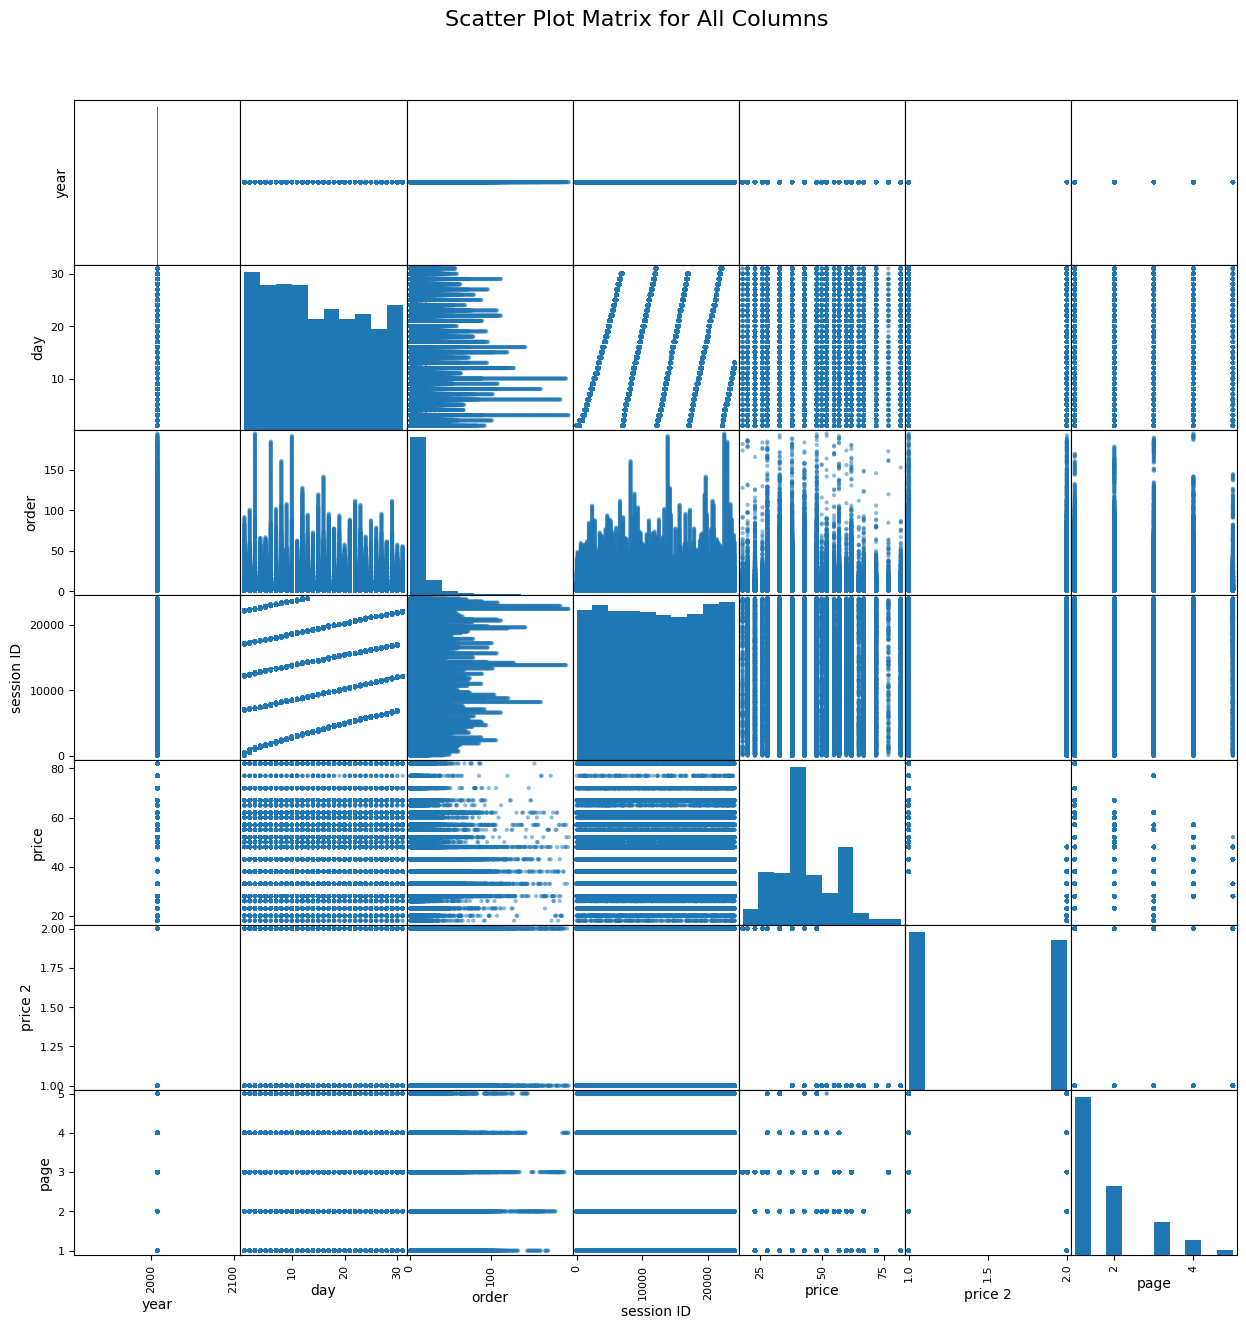

In [66]:
columns_of_interest = df.columns

# Create a scatter plot matrix for all columns
scatter_matrix(df[columns_of_interest], figsize=(15, 15), alpha=0.5)
plt.suptitle('Scatter Plot Matrix for All Columns', y=0.94, fontsize=16)
plt.show()




<h3 align="center"> <font color='black'>Exploring Relationship between Country and Price</font></h3> 

---

<div class="alert alert-block alert-success">  
    Initially the country was noted in form of Number, so we performed <b>Label Encoding</b>
    The <b>price</b> is in dollar.

In the plot the summation of price of all the order is on x-axis and the country name is not y-axis.

Creating a representation of maximum sale n each country.

</div>


<div class="alert alert-block alert-warning">  
<b><I>Observation<I></b> 
    <P>*   Poland and Czexh Republic with maximum sale</P>
<P>*   France and Estonia generating sale less than 125$</P>
</div>




In [67]:
df7 = df.groupby('country')[['price']].count()
df7 = df7.sort_values(['price'], ascending=False)
df7 = df7.query("price > 100")
fig = px.bar(df7, x=df7.index, y='price')
fig.show()


<h3 align="center"> <font color='black'>Exploring Relationship between Country and Order</font></h3> 

---


<div class="alert alert-block alert-success">  
    Initially the country was noted in form of Number, so we performed Label Encoding.

Order column assigns a numerical value (e.g., 1, 2, 3, ...) to each user action within a session based on the order in which the actions occurred

In the plot the average number of clicks per order for each country is lotted.

This help us to know how much the user is spending time or surfing before placing an order

</div>




<div class="alert alert-block alert-warning">  
<b><I>Observation<I></b> 
    

From this plot we can make multiple observation

the countries with high average click
High engagement is a positive indication but for countries likeR romania and Estonia where the value is extremely high it can denote that the user has to spend a lot of time to find the desired product and they might stuggle with unclear information about product, complex user experience

This can lead too frustation or abandonment.

Countries with low average click
This might be concluded as the user experience is straight forward which is positive, and the customers are clear about the need of the product.But at the same time extremely low click average may denote missed oppurunit of cross-selling and upselling.

<b>Cross-selling</b> is a sales technique where a seller encourages a customer to purchase additional products or services related to their initial purchase. The goal is to enhance the customer's shopping experience by offering relevant and useful products.

This indicating:

<li> lack of complementary products
<li>Lack of good recommendation system
<li>Monoploy in market
    
<b>Upselling</b> is a sales technique where a seller encourages a customer to purchase a higher-priced or upgraded version of the product they are interested in or have already chosen. her ethe goal is to increase the order value by convincing the customer to opt for a more premium or feature-rich option.

this indicates:

<li>lack of advanced products or better products
<li>No proper recommmendation system
</div>


---

In [68]:
unique_orders = df['order'].unique()
unique_orders

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [69]:
df8 = df.groupby('country')[['order']].sum()
df8 = df8.sort_values(['order'], ascending=False)

df9 = df.groupby('country')[['order']].count()
df9 = df9.sort_values(['order'], ascending=False)

df8['avreage_clicks'] = df8/df9
df8 = df8.sort_values(['avreage_clicks'], ascending=False)
df8 = df8.query("avreage_clicks > 3 ")
fig = px.scatter(df8, x=df8.index, y="avreage_clicks",
                 size="avreage_clicks", color=df8.index, size_max=60)
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.




<h3 align="center"> <font color='black'>Clicks vs Sales</font></h3> 

---
<div class="alert alert-block alert-warning">  
<b><I>Observation</I></b> 


<li>Price and Order Correlation: As the number of orders increases, there is a significant decrease in price for all categories.

<li>All categories, including blouses, sale items, skirts, and trousers, follow a similar trend where higher order volumes correlate with lower prices.

<li>The majority of data points are concentrated at the higher price and lower order end of the graph, suggesting that fewer orders are placed when prices are high.

</div>

 
<div class="alert alert-block alert-success">  
<b><I>Conclusion</I></b> 


This pattern may indicate that promotional sales or discounts could effectively increase the number of orders.
</div>

In [70]:
df11 = df.groupby(by=["order",'page 1 (main category)'])[["price"]].sum().reset_index()
fig = px.scatter(df11, x="order", y="price",color=df11['page 1 (main category)'])
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



<h3 align="center"> <font color='black'>Month vs Buying</font></h3> 

---

<div class = "alert alert-block alert-warning">
1st pie chart denotes the the sales in all the moonths, since in the dataset in the month of August there is only datatill 13th day only so we have plotted a graph without august month also.
</div>
<div class="alert alert-block alert-success">  
<b><I>Conclusion</I></b> 

As we can see April and May is the most selling months and June is the lowest selling month

The data for August is incomplete. it stops at day 13 only
</div>



In [71]:
df_1 = df.groupby("month")[["price"]].sum()
df_2 = df[df['month'] != 'August'].groupby("month")[["price"]].sum()

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[
                    [{'type': 'domain'}, {'type': 'domain'}]])

fig.add_trace(go.Pie(labels=df_1.index, values=df_1["price"], name="All monthes"),
              1, 1)
fig.add_trace(go.Pie(labels=df_2.index, values=df_2['price'], name="All months except August"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hoverinfo="label+percent")

fig.update_layout(
    title_text="Relationship between month and buying from the website")

fig.show()

In [72]:
df[df['month'] == 'May']['day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [73]:
df[df['month'] == 'August']['day'].unique() #incomplete data

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

<h2 align="center"> <font color='black'>Distribution of products in main page</font></h2>

---

<div class="alert alert-block alert-warning">  
    <b><i>Observation</i></b> 
    
<li> page 1 : Impressive product (trousers in page 1)
<li>page 2 : Good product(Skirts)
<li> page 3: less interaction
<li> page 4 and page 5 only for sale
</div>




In [74]:
df1 = df.groupby(by=["page", "page 1 (main category)"]).size().reset_index(name="counts")

px.bar(data_frame=df1, x="page", y="counts",
       color="page 1 (main category)", barmode="group")

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



<h2 align="center"> <font color='black'>Buying Influced by day due to sale</font></h2> 

---



In [75]:
df9 = df[df['page 1 (main category)']== "sale"]
df9 = df.groupby(by=["month","day"])['page 1 (main category)'].count().reset_index(name="counts")


fig = px.scatter(df9, y='month', x="day",
                 size="counts")
fig.show()

<h2 align="center"> <font color='black'>Relationship between country and buying days</font></h2>

---

<div class="alert alert-block alert-warning">  
    <b><i>Conclusion</i></b> 
    <li>For Poland, selling products is very high in First of the month and then decreases by the last day of the month

<li>For Czech Republic, selling products goes up and down within the days of the month
</div>


In [76]:
df_sum = df.groupby(by=["country", 'day'])[['price']].sum().reset_index()
df_sum = df_sum.sort_values(['price'], ascending=False)

count = df.groupby(by=["country", 'day'])[['price']].count().reset_index()
count = count.sort_values(['price'], ascending=False)

df_sum['avreage_prices'] = df_sum['price']/count['price']
df_sum = df_sum.sort_values(['avreage_prices'], ascending=False)

fig = px.scatter(df_sum, x=df_sum["country"], y=df_sum["day"],color=df_sum['avreage_prices'],size=df_sum['avreage_prices'])
fig.show()

<h2 align="center"> <font color='black'>Price category vs Purchase</font></h2>

---
<div class="alert alert-block alert-warning">  
<b><I>Observation</I></b> 


<li>People are buying elow average price trouser and above average price skrits, blouses and sale product

</div>

<div class="alert alert-block alert-success">  
<b><I>Conclusion</I></b> 


<li>Maybe due to high number of listing of trousers the sale of trousers is high in below average price.

</div>






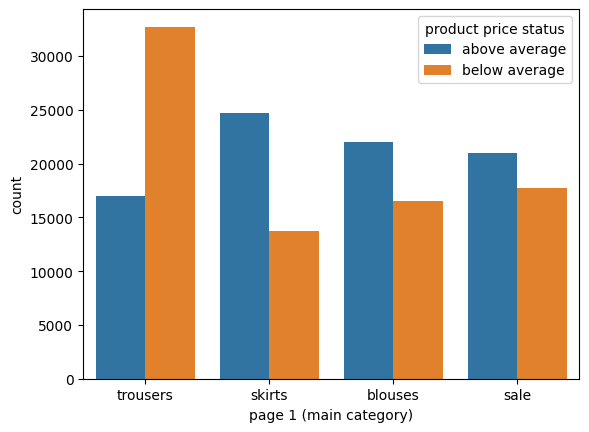

In [77]:
import seaborn as sns
df_copy = df.copy()
df_copy['product price status'] = df_copy['price 2'].map({
    1: 'above average',
    2: 'below average'
}).astype('category')


sns.countplot(data = df_copy, x = 'page 1 (main category)', hue = 'product price status')
plt.show()

<h2 align="center"> <font color='black'>Influcence of color on sales</font></h2>

---


In [78]:
df3 = df.groupby("colour")[["price"]].sum()
df3 = df3.sort_values(['price'], ascending=False)

In [79]:
fig = px.bar(data_frame=df3, x=df3.index, y="price", text_auto='.2s', color=df3.index,
             title="Colour of products with their prices")
fig.update_traces(textfont_size=12, textangle=0,
                  textposition="outside", cliponaxis=False)
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



<h2 align="center"> <font color='black'>Location on Page vs Color</font></h2>

---

In [80]:
df2 = df.groupby(by=["location", "colour"]).size().reset_index(name="counts")
fig = px.scatter(df2, x="location", y="counts",
                 color='colour', size='counts', size_max=30)
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



<h2 align="center"> <B><font color='gray'>DPL : PRE-PROCESS THE DATASET</B></font></h2>


In [81]:
total = df.shape[0]
missing_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
for col in missing_columns:
    null_count = df[col].isnull().sum()
    per = (null_count/total) * 100
    print(f"{col}: {null_count} ({round(per, 3)}%)")

In [82]:
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


In [83]:
df.drop('session ID', axis=1, inplace=True)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version

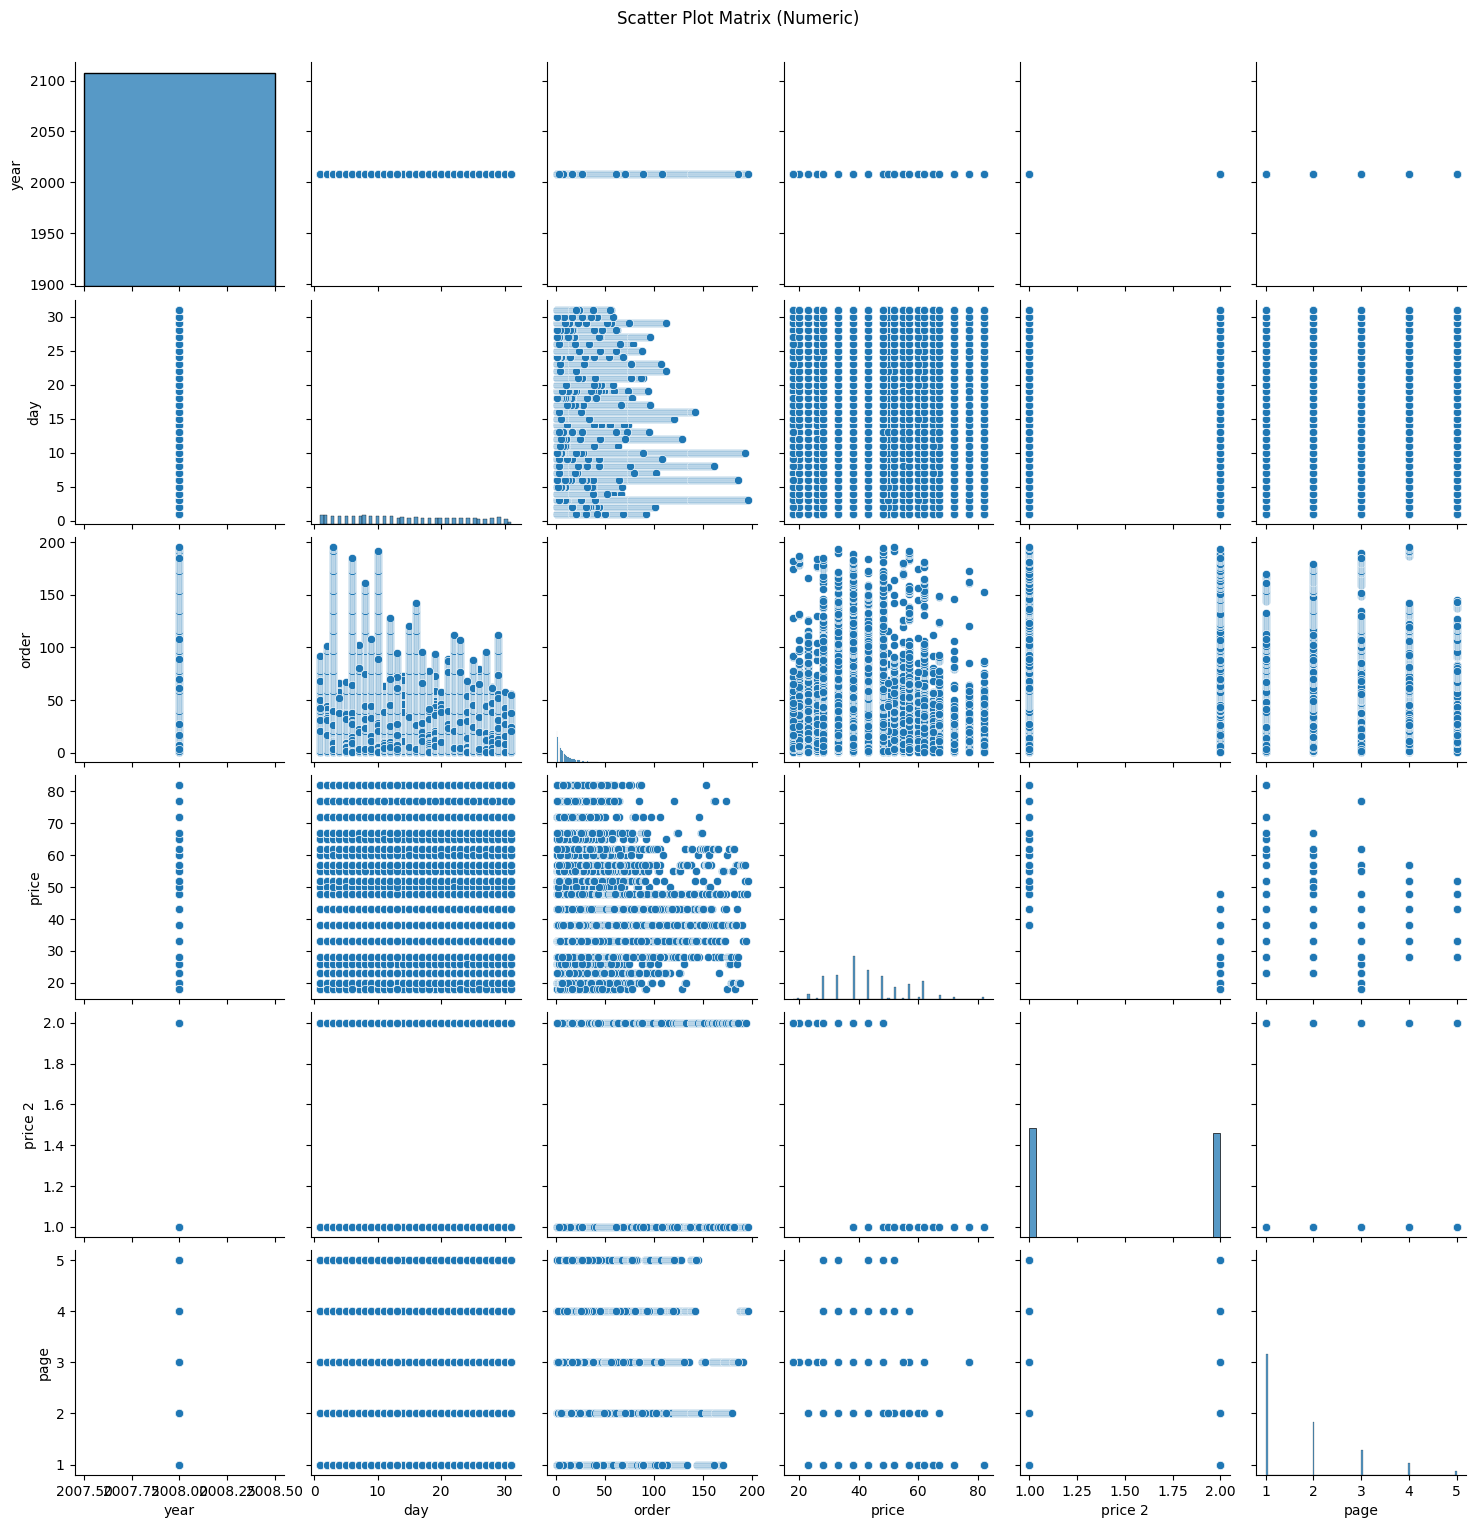

ValueError: Could not interpret input 'category'

<Figure size 800x600 with 0 Axes>

In [84]:
# Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include=['int', 'float']).columns
categorical_cols = ['category']  # List of categorical columns

# Plot pairplot for numeric columns
sns.pairplot(df[numeric_cols])
plt.suptitle('Scatter Plot Matrix (Numeric)', y=1.02)
plt.show()

# If you have categorical data, use a different visualization approach for categorical columns
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=df, palette='viridis')
    plt.title(f'Count of {col}')
    plt.show()

In [85]:
encoders = {}
for col in df.columns:
    if df[col].dtype == 'object':
            label_encoder = LabelEncoder()
            df[col] = label_encoder.fit_transform(df[col])
            encoders[col] = label_encoder

Text(0.5, 1.0, 'pearson correlation')

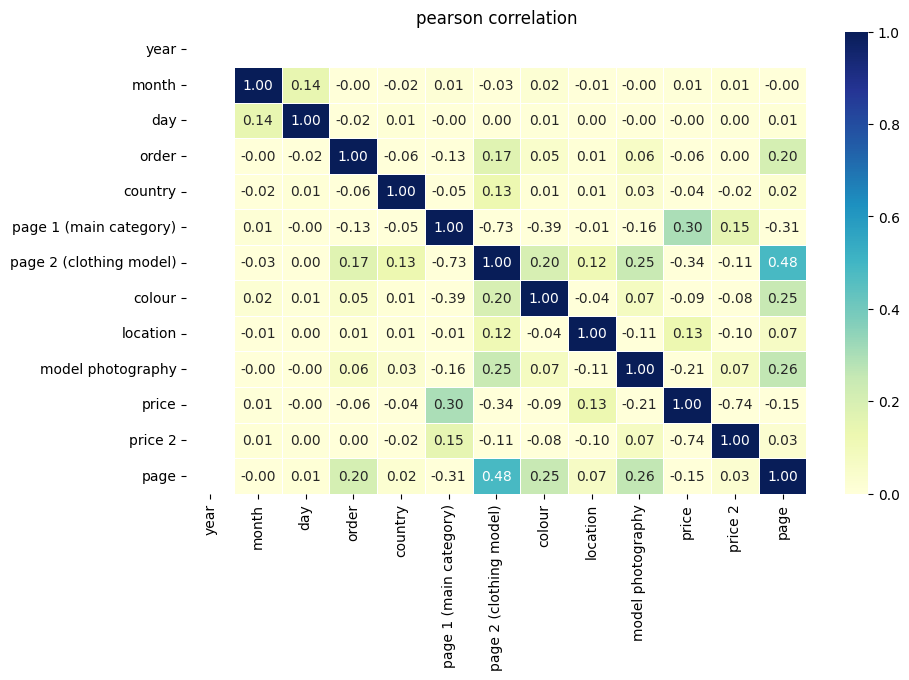

In [86]:
plt.figure(figsize=(10,6))
corr_matrix = df.corr(method="pearson")
sns.heatmap(corr_matrix, vmin=0, vmax=1, annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5)
plt.title("pearson correlation")

<h2 align="center"><b> <font color='gray'>Dimensionality Reduction PCA and SVD</b></font></h2>

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA


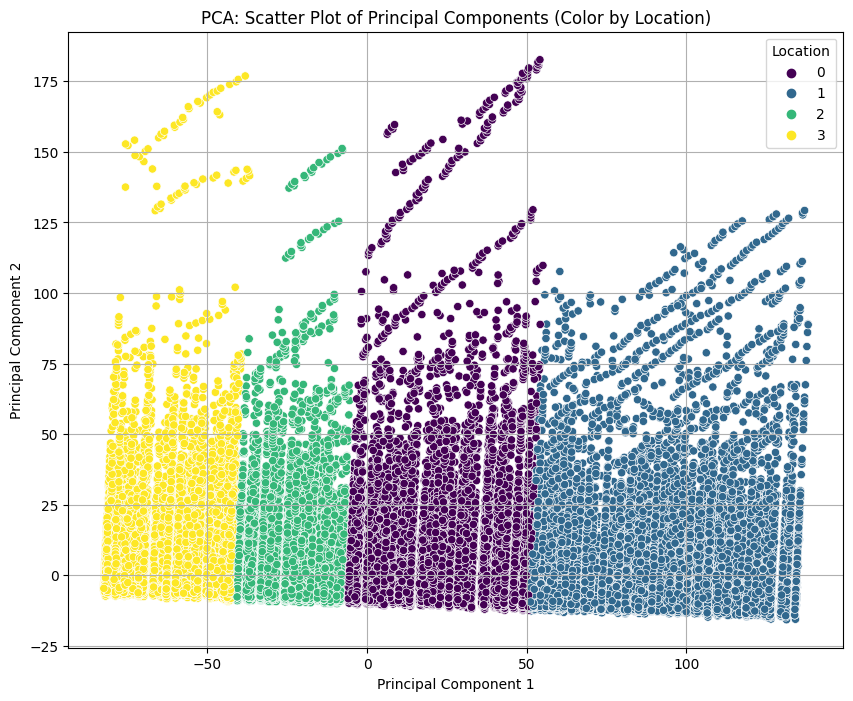

In [88]:
# Assuming df is your DataFrame with relevant columns
features = ['month', 'day', 'order', 'country', 'page 1 (main category)',
            'page 2 (clothing model)', 'colour', 'location', 'model photography',
            'price', 'price 2', 'page']

# Extract the features from the DataFrame
data = df[features]
y = data['page 1 (main category)']






# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data)
# Use Min-Max scaling
min_max_scaler = MinMaxScaler()
X_minmax_scaled = min_max_scaler.fit_transform(data)

# Apply PCA with Min-Max scaled data
pca.fit(X_minmax_scaled)

# Create a DataFrame for the principal components
pc_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

# Plot PCA results with color-coded points based on 'location'
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue=df['page 1 (main category)'], palette='viridis', data=pc_df)
plt.title('PCA: Scatter Plot of Principal Components (Color by Location)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.legend(title='Location')
plt.show()





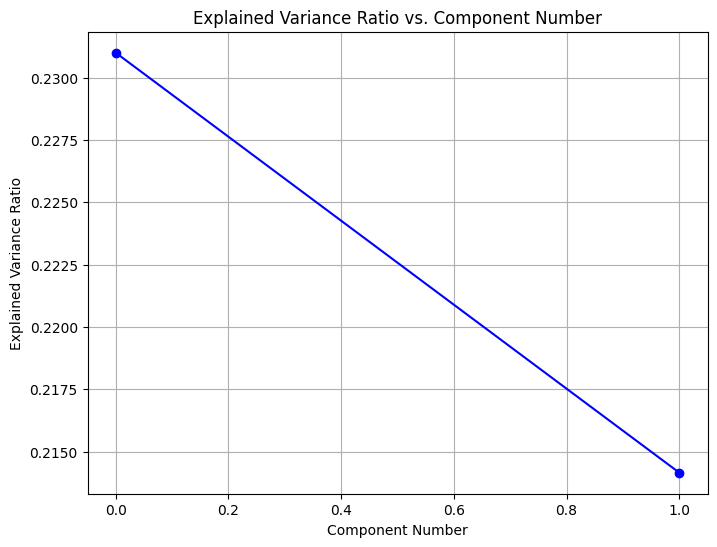

Optimal Number of Components: 1


In [89]:

# Use Min-Max scaling
min_max_scaler = MinMaxScaler()
X_minmax_scaled = min_max_scaler.fit_transform(data)
# Fit PCA to the scaled data
pca.fit(X_minmax_scaled)


# Plot explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(pca.explained_variance_ratio_, marker='o', linestyle='-', color='b')
plt.xlabel('Component Number')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Component Number')
plt.grid(True)
plt.show()

# Calculate cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Determine the number of components that explain a desired percentage of variance (e.g., 80%)
desired_variance_ratio = 0.8
optimal_n_components = np.argmax(cumulative_variance_ratio >= desired_variance_ratio) + 1

print("Optimal Number of Components:", optimal_n_components)

In [90]:
pc_df

,PC1,PC2
0,-77.695886,-5.039490
1,-75.032168,-4.253839
2,-13.509203,-6.151428
3,-31.410054,-4.148178
4,-9.519156,-4.353130
...,...,...
165469,-40.723845,-7.660763
165470,-82.467340,-4.645832
165471,-71.724967,-6.206920
165472,4.184610,-8.329386


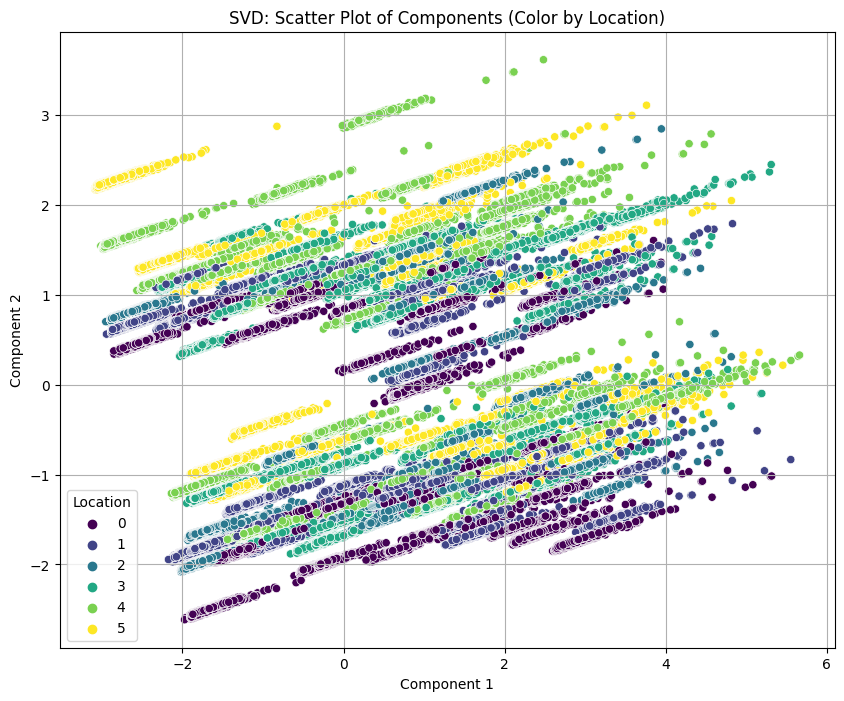

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD

# Assuming df is your DataFrame with relevant columns
features = ['month', 'day', 'order', 'country', 'page 1 (main category)',
            'page 2 (clothing model)', 'colour', 'location', 'model photography',
            'price', 'price 2', 'page']

# Extract the features from the DataFrame
data = df[features]

# Standardize the data (important for SVD)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Apply SVD for dimensionality reduction with n_components=5
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(data_scaled)

# Create a DataFrame for the SVD-transformed data
svd_df = pd.DataFrame(data=X_svd, columns=['Component 1', 'Component 2'])

# Plot SVD results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Component 1', y='Component 2', hue=df['location'], palette='viridis', data=svd_df)
plt.title('SVD: Scatter Plot of Components (Color by Location)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid(True)
plt.legend(title='Location')
plt.show()


<div class="alert alert-block alert-danger">  
<b>PCA : </b>better clustering  than SVD 
<b> it should be noted that since the optimal n-components is coming out to be 1 it sugguests that non-linear dimensioanlty techniques should  be used in the dataset.
</div>

In [92]:
from sklearn.manifold import TSNE
# Apply t-SNE for dimensionality reduction (reduce to 2 components for visualization)
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X_minmax_scaled)



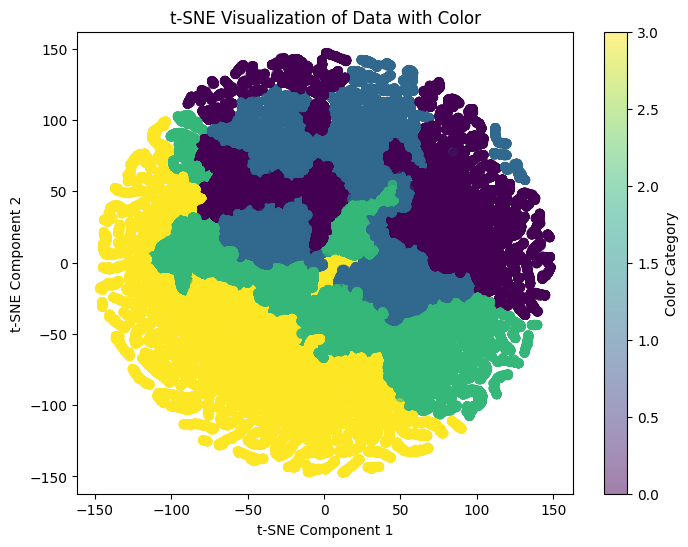

In [93]:
colors = data['page 1 (main category)']  # Assuming 'COLOUR' is the column representing colors

# Visualize the t-SNE results with color information
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=colors, cmap='viridis', alpha=0.5)
plt.title('t-SNE Visualization of Data with Color')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Color Category')
plt.show()

In [94]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

<h2 align="center"><B> <font color='gray'>APPLICAITON OF MODELS</B></font></h2>

In [95]:
# Define the models to evaluate
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier(),
    'LightGBM': LGBMClassifier()
}

# Train each model and evaluate performance
results = {}
for name, model in models.items():
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

# Display the results
for name, accuracy in results.items():
    print(f'{name}: Accuracy = {accuracy:.4f}')


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002413 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 132379, number of used features: 2
[LightGBM] [Info] Start training from score -1.454557
[LightGBM] [Info] Start training from score -1.451875
[LightGBM] [Info] Start training from score -1.465225
[LightGBM] [Info] Start training from score -1.199518
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Logistic Regression: Accuracy = 1.0000
Random Forest: Accuracy = 0.9998
Support Vector Machine: Accuracy = 0.9997
Gradient Boosting: Accuracy = 0.9996
K-Nearest Neighbors: Accuracy = 0.9997
AdaBoost: Accuracy = 0.9985
XGBoost: Accuracy = 0.9993
LightGBM: Accuracy = 0.9989


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning:

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.



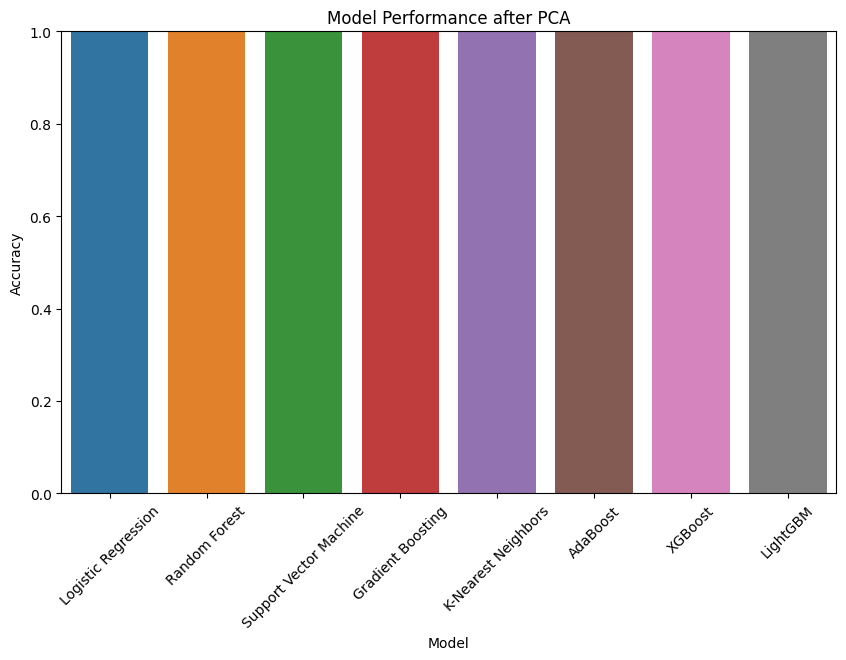

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot model performance
plt.figure(figsize=(10, 6))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title('Model Performance after PCA')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1.0)
plt.xticks(rotation=45)
plt.show()


<div class="alert alert-block alert-info">
<b>Classification Report</b>
</div>


In [97]:
from sklearn.metrics import classification_report

# Find the model with the highest accuracy
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

# Generate classification report if accuracy > 90%
if results[best_model_name] > 0.9:
    print(f"Classification Report for {best_model_name}:")
    y_pred_best = best_model.predict(X_test_pca)
    report = classification_report(y_test, y_pred_best)
    print(report)
else:
    print("No model achieved accuracy > 90%.")

# Display the results
print(f"Best Model: {best_model_name}, Accuracy: {results[best_model_name]:.4f}")

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7666
           1       1.00      1.00      1.00      7753
           2       1.00      1.00      1.00      7825
           3       1.00      1.00      1.00      9851

    accuracy                           1.00     33095
   macro avg       1.00      1.00      1.00     33095
weighted avg       1.00      1.00      1.00     33095

Best Model: Logistic Regression, Accuracy: 1.0000


<div class="alert alert-block alert-danger">  
    <h1><b>Accuracy : </b>Model overfitted  </h1>
</div>